## 43 堆积面积图 （Stacked Area Chart）
堆积面积图可以直观地显示多个时间序列的贡献程度，因此很容易相互比较。

In [1]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.3.3
0.11.0


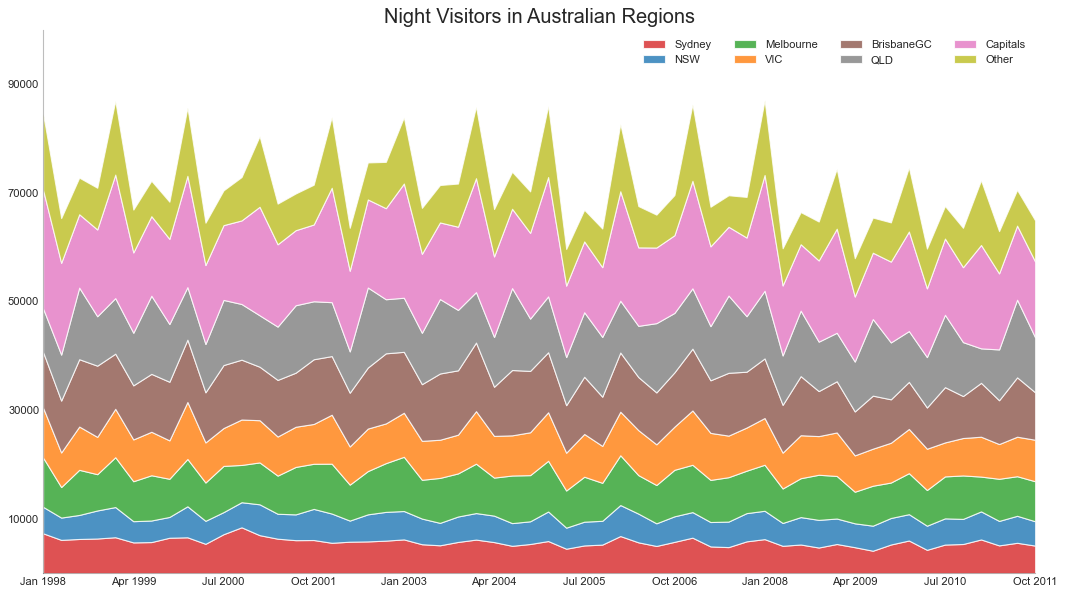

In [2]:
# Import Data
df = pd.read_csv('datasets/nightvisitors.csv')

# Decide Colors
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)
columns = df.columns[1:]
labs = columns.values.tolist()

# Prepare data
x  = df['yearmon'].values.tolist()
y0 = df[columns[0]].values.tolist()
y1 = df[columns[1]].values.tolist()
y2 = df[columns[2]].values.tolist()
y3 = df[columns[3]].values.tolist()
y4 = df[columns[4]].values.tolist()
y5 = df[columns[5]].values.tolist()
y6 = df[columns[6]].values.tolist()
y7 = df[columns[7]].values.tolist()
y = np.vstack([y0, y2, y4, y6, y7, y5, y1, y3])

# Plot for each column
labs = columns.values.tolist()
ax = plt.gca()
ax.stackplot(x, y, labels=labs, colors=mycolors, alpha=0.8)

# Decorations
ax.set_title('Night Visitors in Australian Regions', fontsize=18)
ax.set(ylim=[0, 100000])
ax.legend(fontsize=10, ncol=4)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(10000, 100000, 20000), fontsize=10)
plt.xlim(x[0], x[-1])

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.show()